Housekeeping

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.optimize import fsolve

from f_detrend import detrend_fuction

sn.set_style('whitegrid')
%matplotlib inline

In [2]:
# Expanded and modivfied version (first column now string)
def read_table(filename,keyword='ciclo',rescale=1,ncols=5,start=2):
    t0 = start
    t1 = ncols+start
    results_follow = 0
    row_names = []
    table_raw = np.empty(t1-t0)
    f = open(filename,'r')
    for line in f:
        words = line.split()
        if len(words)>1 and words[0] == keyword:
            results_follow=1
            colnames = words[t0:t1]
        elif len(words)>1 and words[0] == "Total":
            break
        elif len(words)>1 and results_follow==1:
            row_names.append(words[0])
            buff_v = []
            for w in words[t0:t1]: 
                w = w.replace(",","")
                buff_v.append(w)
            table_raw = np.vstack((table_raw,np.array(buff_v,dtype=float)/rescale))
    table_raw = table_raw[1:,:]
    return pd.DataFrame(table_raw, columns=colnames,index=np.array(row_names))

In [3]:
dates = []
for year in range(1987,2023):
    for quarter in range(1,5):
        dates.append(str(year)+"Q"+str(quarter))
dates = dates[1:]

t0 = 59
T = len(dates)
date_dict = dict(zip(range(t0,T+t0),dates))
date_dict_reverse = dict(zip(dates,range(0,T)))
date_dict_reverse_ciclo = dict(zip(dates,range(t0,T+t0)))

In [18]:
coefs_par = []
coefs_mar = []
coefs_parxmar = []
coefs_div = []
bounds_par = []
bounds_mar = []
bounds_parxmar = []
bounds_div = []
qs = []
cc = 186
f = open('./regtabs/prob_perm_stocks_w.log','r')
for line in f:
    words = line.split()
    #print(words)
    if  len(words)>1 and words[0]=='permanent' and words[1]=='|':
        #indx_if = words.index("if")
        #ciclo = int(words[indx_if+1][7:10])
        ciclo = cc
        qs.append(date_dict[ciclo])
        cc +=1
    if len(words)>0 and 'parent'==words[0]:
        coefs_par.append(float(words[2]))
        bounds_par.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_mar.append(float(words[2]))
        bounds_mar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent'==words[0]:
        coefs_parxmar.append(float(words[2]))
        bounds_parxmar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_div.append(float(words[2]))
        bounds_div.append((float(words[-2]),float(words[-1])))
bounds_par= np.array(bounds_par)
coefs_par = np.array(coefs_par)
bounds_mar= np.array(bounds_mar)
coefs_mar = np.array(coefs_mar)
bounds_parxmar = np.array(bounds_parxmar)
coefs_parxmar = np.array(coefs_parxmar)
bounds_div= np.array(bounds_div)
coefs_div = np.array(coefs_div)

In [19]:
coefs_m_par = []
coefs_m_mar = []
coefs_m_parxmar = []
coefs_m_div = []
bounds_m_par = []
bounds_m_mar = []
bounds_m_parxmar = []
bounds_m_div = []
f = open('./regtabs/prob_perm_stocks_m.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and 'parent'==words[0]:        
        coefs_m_par.append(float(words[2]))
        bounds_m_par.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_m_mar.append(float(words[2]))
        bounds_m_mar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent'==words[0]:
        coefs_m_parxmar.append(float(words[2]))
        bounds_m_parxmar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_m_div.append(float(words[2]))
        bounds_m_div.append((float(words[-2]),float(words[-1])))
bounds_m_par= np.array(bounds_m_par)
coefs_m_par = np.array(coefs_m_par)
bounds_m_mar= np.array(bounds_m_mar)
coefs_m_mar = np.array(coefs_m_mar)
bounds_m_parxmar = np.array(bounds_m_parxmar)
coefs_m_parxmar = np.array(coefs_m_parxmar)
bounds_m_div= np.array(bounds_m_div)
coefs_m_div = np.array(coefs_m_div)

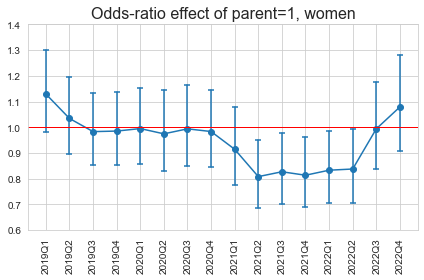

In [24]:
colors = sn.color_palette()
plt.figure(figsize=(6,4))
plt.title("Odds-ratio effect of parent=1, women",fontsize=16)
plt.plot(qs,coefs_par,marker='o')
plt.scatter(qs,bounds_par[:,0],marker='_',color=colors[0])
plt.scatter(qs,bounds_par[:,1],marker='_',color=colors[0])
for i in range(coefs_par.size):
    plt.plot((qs[i],qs[i]),(bounds_par[i,0],bounds_par[i,1]),c=colors[0])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.6,1.4)
plt.tight_layout()
plt.savefig('./plots_reg/prob_women_parent_time.pdf',format='pdf',bbox_inches='tight')
plt.show()

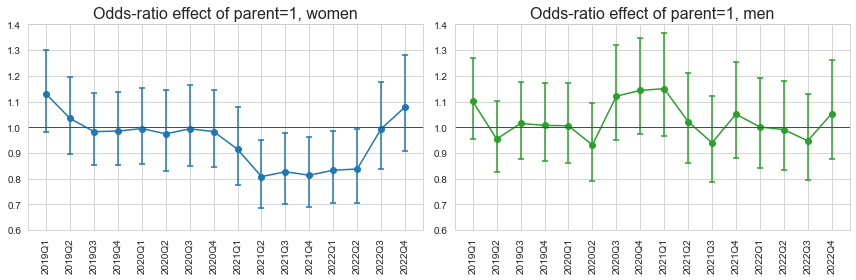

In [25]:
colors = sn.color_palette()
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Odds-ratio effect of parent=1, women",fontsize=16)
plt.plot(qs,coefs_par,marker='o')
plt.scatter(qs,bounds_par[:,0],marker='_',color=colors[0])
plt.scatter(qs,bounds_par[:,1],marker='_',color=colors[0])
for i in range(coefs_par.size):
    plt.plot((qs[i],qs[i]),(bounds_par[i,0],bounds_par[i,1]),c=colors[0])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.6,1.4)

plt.subplot(122)
plt.title("Odds-ratio effect of parent=1, men",fontsize=16)
plt.plot(qs,coefs_m_par,color=colors[2],marker='o')
plt.scatter(qs,bounds_m_par[:,0],marker='_',color=colors[2])
plt.scatter(qs,bounds_m_par[:,1],marker='_',color=colors[2])
for i in range(coefs_m_par.size):
    plt.plot((qs[i],qs[i]),(bounds_m_par[i,0],bounds_m_par[i,1]),c=colors[2])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.6,1.4)
plt.tight_layout()
plt.savefig('./plots_reg/prob_womenVmen_parent_time.pdf',format='pdf',bbox_inches='tight')
plt.show()

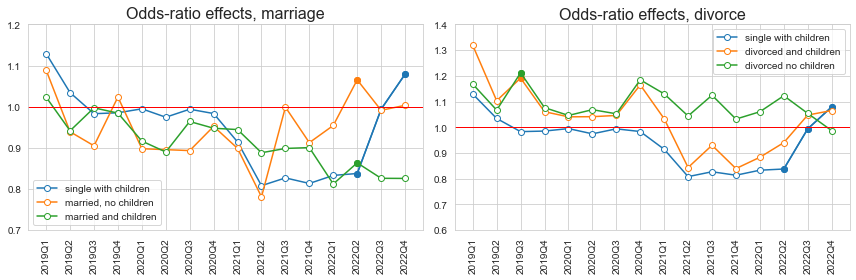

In [26]:
colors = sn.color_palette()
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Odds-ratio effects, marriage",fontsize=16)
plt.plot(qs,coefs_par,marker='o',mfc='white',label='single with children')
plt.plot(qs[-3:],coefs_par[-3:],marker='o',color=colors[0])
plt.plot(qs,coefs_mar,marker='o',mfc='white',label='married, no children')
plt.plot(qs[-3],coefs_mar[-3],marker='o',color=colors[1])
plt.plot(qs,coefs_parxmar*coefs_par*coefs_mar,mfc='white',marker='o',label='married and children')
plt.plot(qs[-3],(coefs_parxmar*coefs_par*coefs_mar)[-3],marker='o',color=colors[2])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.7,1.2)
plt.legend()

plt.subplot(122)
plt.title("Odds-ratio effects, divorce",fontsize=16)
plt.plot(qs,coefs_par,marker='o',mfc='white',label='single with children')
plt.plot(qs[-3:],coefs_par[-3:],marker='o',color=colors[0])
plt.plot(qs,coefs_par*coefs_div,marker='o',mfc='white',label='divorced and children')
plt.plot(qs[2],(coefs_par*coefs_div)[2],marker='o',color=colors[1])
plt.plot(qs,coefs_div,marker='o',mfc='white',label='divorced no children')
plt.plot(qs[2],coefs_div[2],marker='o',color=colors[2])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.6,1.4)
plt.legend()

plt.tight_layout()
plt.savefig('./plots_reg/prob_women_all_time.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [27]:
coefs_i_m_par = []
coefs_i_m_mar = []
coefs_i_m_parxmar = []
coefs_i_m_div = []
bounds_i_m_par = []
bounds_i_m_mar = []
bounds_i_m_parxmar = []
bounds_i_m_div = []
f = open('./regtabs/prob_inac_stocks_m.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and 'parent'==words[0]:        
        coefs_i_m_par.append(float(words[2]))
        bounds_i_m_par.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_i_m_mar.append(float(words[2]))
        bounds_i_m_mar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent'==words[0]:
        coefs_i_m_parxmar.append(float(words[2]))
        bounds_i_m_parxmar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_i_m_div.append(float(words[2]))
        bounds_i_m_div.append((float(words[-2]),float(words[-1])))
bounds_i_m_par= np.array(bounds_i_m_par)
coefs_i_m_par = np.array(coefs_i_m_par)
bounds_i_m_mar= np.array(bounds_i_m_mar)
coefs_i_m_mar = np.array(coefs_i_m_mar)
bounds_i_m_parxmar = np.array(bounds_i_m_parxmar)
coefs_i_m_parxmar = np.array(coefs_i_m_parxmar)
bounds_i_m_div= np.array(bounds_i_m_div)
coefs_i_m_div = np.array(coefs_i_m_div)

FileNotFoundError: [Errno 2] No such file or directory: './regtabs/prob_inac_stocks_m.log'

In [107]:
coefs_i_f_par = []
coefs_i_f_mar = []
coefs_i_f_parxmar = []
coefs_i_f_div = []
bounds_i_f_par = []
bounds_i_f_mar = []
bounds_i_f_parxmar = []
bounds_i_f_div = []
f = open('./regtabs/prob_inac_stocks_w.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and 'parent'==words[0]:        
        coefs_i_f_par.append(float(words[2]))
        bounds_i_f_par.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_i_f_mar.append(float(words[2]))
        bounds_i_f_mar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent'==words[0]:
        coefs_i_f_parxmar.append(float(words[2]))
        bounds_i_f_parxmar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_i_f_div.append(float(words[2]))
        bounds_i_f_div.append((float(words[-2]),float(words[-1])))
bounds_i_f_par= np.array(bounds_i_f_par)
coefs_i_f_par = np.array(coefs_i_f_par)
bounds_i_f_mar= np.array(bounds_i_f_mar)
coefs_i_f_mar = np.array(coefs_i_f_mar)
bounds_i_f_parxmar = np.array(bounds_i_f_parxmar)
coefs_i_f_parxmar = np.array(coefs_i_f_parxmar)
bounds_i_f_div= np.array(bounds_i_f_div)
coefs_i_f_div = np.array(coefs_i_f_div)

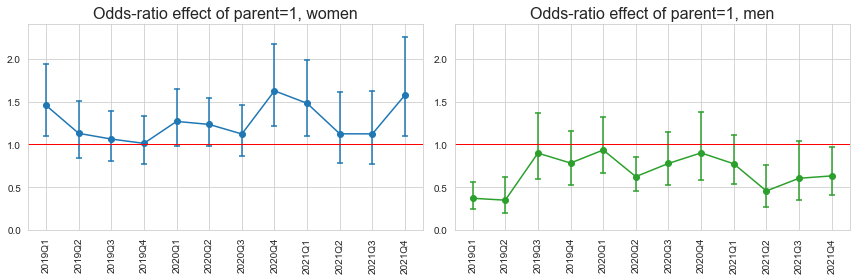

In [112]:
colors = sn.color_palette()
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Odds-ratio effect of parent=1, women",fontsize=16)
plt.plot(qs,coefs_i_f_par,marker='o')
plt.scatter(qs,bounds_i_f_par[:,0],marker='_',color=colors[0])
plt.scatter(qs,bounds_i_f_par[:,1],marker='_',color=colors[0])
for i in range(coefs_par.size):
    plt.plot((qs[i],qs[i]),(bounds_i_f_par[i,0],bounds_i_f_par[i,1]),c=colors[0])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.,2.4)
 
plt.subplot(122)
plt.title("Odds-ratio effect of parent=1, men",fontsize=16)
plt.plot(qs,coefs_i_m_par,color=colors[2],marker='o')
plt.scatter(qs,bounds_i_m_par[:,0],marker='_',color=colors[2])
plt.scatter(qs,bounds_i_m_par[:,1],marker='_',color=colors[2])
for i in range(coefs_i_m_par.size):
    plt.plot((qs[i],qs[i]),(bounds_i_m_par[i,0],bounds_i_m_par[i,1]),c=colors[2])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.,2.4)
plt.tight_layout()
plt.savefig('./plots_reg/prob_i_womenVmen_parent_time.pdf',format='pdf',bbox_inches='tight')
plt.show()

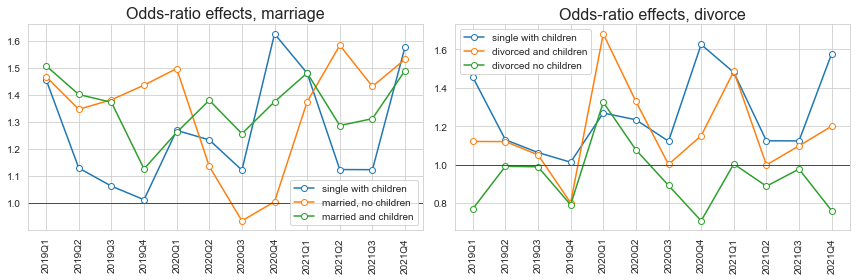

In [114]:
colors = sn.color_palette()
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Odds-ratio effects, marriage",fontsize=16)
plt.plot(qs,coefs_i_f_par,marker='o',mfc='white',label='single with children')
# plt.plot(qs[-3:],coefs_par[-3:],marker='o',color=colors[0])
plt.plot(qs,coefs_i_f_mar,marker='o',mfc='white',label='married, no children')
# plt.plot(qs[-3],coefs_mar[-3],marker='o',color=colors[1])
plt.plot(qs,coefs_i_f_parxmar*coefs_i_f_par*coefs_i_f_mar,mfc='white',marker='o',label='married and children')
# plt.plot(qs[-3],(coefs_parxmar*coefs_par*coefs_mar)[-3],marker='o',color=colors[2])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
# plt.ylim(0.7,1.2)
plt.legend()

plt.subplot(122)
plt.title("Odds-ratio effects, divorce",fontsize=16)
plt.plot(qs,coefs_i_f_par,marker='o',mfc='white',label='single with children')
# plt.plot(qs[-3:],coefs_par[-3:],marker='o',color=colors[0])
plt.plot(qs,coefs_i_f_par*coefs_i_f_div,marker='o',mfc='white',label='divorced and children')
# plt.plot(qs[2],(coefs_par*coefs_div)[2],marker='o',color=colors[1])
plt.plot(qs,coefs_i_f_div,marker='o',mfc='white',label='divorced no children')
# plt.plot(qs[2],coefs_div[2],marker='o',color=colors[2])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
# plt.ylim(0.6,1.4)
plt.legend()

plt.tight_layout()
plt.savefig('./plots_reg/prob_women_i_all_time.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [115]:
coefs_u_m_par = []
coefs_u_m_mar = []
coefs_u_m_parxmar = []
coefs_u_m_div = []
bounds_u_m_par = []
bounds_u_m_mar = []
bounds_u_m_parxmar = []
bounds_u_m_div = []
f = open('./regtabs/prob_unemp_stocks_m.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and 'parent'==words[0]:        
        coefs_u_m_par.append(float(words[2]))
        bounds_u_m_par.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_u_m_mar.append(float(words[2]))
        bounds_u_m_mar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent'==words[0]:
        coefs_u_m_parxmar.append(float(words[2]))
        bounds_u_m_parxmar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_u_m_div.append(float(words[2]))
        bounds_u_m_div.append((float(words[-2]),float(words[-1])))
bounds_u_m_par= np.array(bounds_u_m_par)
coefs_u_m_par = np.array(coefs_u_m_par)
bounds_u_m_mar= np.array(bounds_u_m_mar)
coefs_u_m_mar = np.array(coefs_u_m_mar)
bounds_u_m_parxmar = np.array(bounds_u_m_parxmar)
coefs_u_m_parxmar = np.array(coefs_u_m_parxmar)
bounds_u_m_div= np.array(bounds_u_m_div)
coefs_u_m_div = np.array(coefs_u_m_div)

In [116]:
coefs_u_f_par = []
coefs_u_f_mar = []
coefs_u_f_parxmar = []
coefs_u_f_div = []
bounds_u_f_par = []
bounds_u_f_mar = []
bounds_u_f_parxmar = []
bounds_u_f_div = []
f = open('./regtabs/prob_unemp_stocks_w.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and 'parent'==words[0]:        
        coefs_u_f_par.append(float(words[2]))
        bounds_u_f_par.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_u_f_mar.append(float(words[2]))
        bounds_u_f_mar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent'==words[0]:
        coefs_u_f_parxmar.append(float(words[2]))
        bounds_u_f_parxmar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_u_f_div.append(float(words[2]))
        bounds_u_f_div.append((float(words[-2]),float(words[-1])))
bounds_u_f_par= np.array(bounds_u_f_par)
coefs_u_f_par = np.array(coefs_u_f_par)
bounds_u_f_mar= np.array(bounds_u_f_mar)
coefs_u_f_mar = np.array(coefs_u_f_mar)
bounds_u_f_parxmar = np.array(bounds_u_f_parxmar)
coefs_u_f_parxmar = np.array(coefs_u_f_parxmar)
bounds_u_f_div= np.array(bounds_u_f_div)
coefs_u_f_div = np.array(coefs_u_f_div)

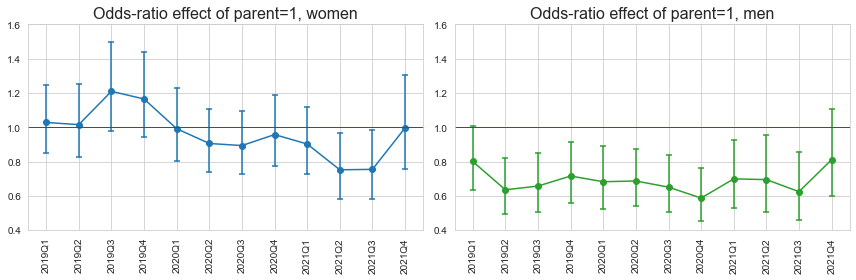

In [126]:
colors = sn.color_palette()
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Odds-ratio effect of parent=1, women",fontsize=16)
plt.plot(qs,coefs_u_f_par,marker='o')
plt.scatter(qs,bounds_u_f_par[:,0],marker='_',color=colors[0])
plt.scatter(qs,bounds_u_f_par[:,1],marker='_',color=colors[0])
for i in range(coefs_par.size):
    plt.plot((qs[i],qs[i]),(bounds_u_f_par[i,0],bounds_u_f_par[i,1]),c=colors[0])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.4,1.6)
 
plt.subplot(122)
plt.title("Odds-ratio effect of parent=1, men",fontsize=16)
plt.plot(qs,coefs_u_m_par,color=colors[2],marker='o')
plt.scatter(qs,bounds_u_m_par[:,0],marker='_',color=colors[2])
plt.scatter(qs,bounds_u_m_par[:,1],marker='_',color=colors[2])
for i in range(coefs_u_m_par.size):
    plt.plot((qs[i],qs[i]),(bounds_u_m_par[i,0],bounds_u_m_par[i,1]),c=colors[2])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.4,1.6)
plt.tight_layout()
plt.savefig('./plots_reg/prob_u_womenVmen_parent_time.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [122]:
coefs_ne_m_par = []
coefs_ne_m_mar = []
coefs_ne_m_parxmar = []
coefs_ne_m_div = []
bounds_ne_m_par = []
bounds_ne_m_mar = []
bounds_ne_m_parxmar = []
bounds_ne_m_div = []
f = open('./regtabs/prob_ne_stocks_m.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and 'parent'==words[0]:        
        coefs_ne_m_par.append(float(words[2]))
        bounds_ne_m_par.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_ne_m_mar.append(float(words[2]))
        bounds_ne_m_mar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent'==words[0]:
        coefs_ne_m_parxmar.append(float(words[2]))
        bounds_ne_m_parxmar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_ne_m_div.append(float(words[2]))
        bounds_ne_m_div.append((float(words[-2]),float(words[-1])))
bounds_ne_m_par= np.array(bounds_ne_m_par)
coefs_ne_m_par = np.array(coefs_ne_m_par)
bounds_ne_m_mar= np.array(bounds_ne_m_mar)
coefs_ne_m_mar = np.array(coefs_ne_m_mar)
bounds_ne_m_parxmar = np.array(bounds_ne_m_parxmar)
coefs_ne_m_parxmar = np.array(coefs_ne_m_parxmar)
bounds_ne_m_div= np.array(bounds_ne_m_div)
coefs_ne_m_div = np.array(coefs_ne_m_div)

In [123]:
coefs_ne_f_par = []
coefs_ne_f_mar = []
coefs_ne_f_parxmar = []
coefs_ne_f_div = []
bounds_ne_f_par = []
bounds_ne_f_mar = []
bounds_ne_f_parxmar = []
bounds_ne_f_div = []
f = open('./regtabs/prob_ne_stocks_w.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and 'parent'==words[0]:        
        coefs_ne_f_par.append(float(words[2]))
        bounds_ne_f_par.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_ne_f_mar.append(float(words[2]))
        bounds_ne_f_mar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent'==words[0]:
        coefs_ne_f_parxmar.append(float(words[2]))
        bounds_ne_f_parxmar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_ne_f_div.append(float(words[2]))
        bounds_ne_f_div.append((float(words[-2]),float(words[-1])))
bounds_ne_f_par= np.array(bounds_ne_f_par)
coefs_ne_f_par = np.array(coefs_ne_f_par)
bounds_ne_f_mar= np.array(bounds_ne_f_mar)
coefs_ne_f_mar = np.array(coefs_ne_f_mar)
bounds_ne_f_parxmar = np.array(bounds_ne_f_parxmar)
coefs_ne_f_parxmar = np.array(coefs_ne_f_parxmar)
bounds_ne_f_div= np.array(bounds_ne_f_div)
coefs_ne_f_div = np.array(coefs_ne_f_div)

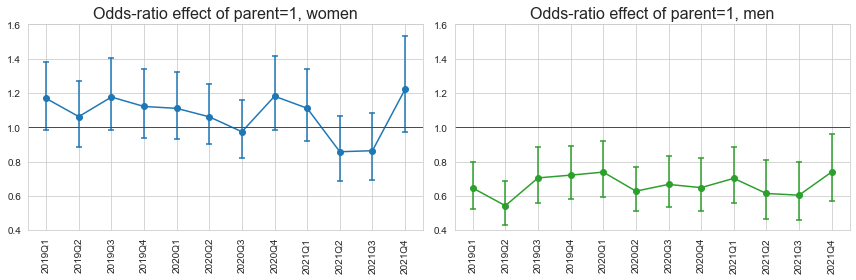

In [125]:
colors = sn.color_palette()
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Odds-ratio effect of parent=1, women",fontsize=16)
plt.plot(qs,coefs_ne_f_par,marker='o')
plt.scatter(qs,bounds_ne_f_par[:,0],marker='_',color=colors[0])
plt.scatter(qs,bounds_ne_f_par[:,1],marker='_',color=colors[0])
for i in range(coefs_par.size):
    plt.plot((qs[i],qs[i]),(bounds_ne_f_par[i,0],bounds_ne_f_par[i,1]),c=colors[0])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.4,1.6)
 
plt.subplot(122)
plt.title("Odds-ratio effect of parent=1, men",fontsize=16)
plt.plot(qs,coefs_ne_m_par,color=colors[2],marker='o')
plt.scatter(qs,bounds_ne_m_par[:,0],marker='_',color=colors[2])
plt.scatter(qs,bounds_ne_m_par[:,1],marker='_',color=colors[2])
for i in range(coefs_ne_m_par.size):
    plt.plot((qs[i],qs[i]),(bounds_ne_m_par[i,0],bounds_ne_m_par[i,1]),c=colors[2])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.4,1.6)
plt.tight_layout()
plt.savefig('./plots_reg/prob_ne_womenVmen_parent_time.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [134]:
coefs_t_m_par = []
coefs_t_m_mar = []
coefs_t_m_parxmar = []
coefs_t_m_div = []
bounds_t_m_par = []
bounds_t_m_mar = []
bounds_t_m_parxmar = []
bounds_t_m_div = []
f = open('./regtabs/prob_temp_stocks_m.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and 'parent'==words[0]:        
        coefs_t_m_par.append(float(words[2]))
        bounds_t_m_par.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_t_m_mar.append(float(words[2]))
        bounds_t_m_mar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent'==words[0]:
        coefs_t_m_parxmar.append(float(words[2]))
        bounds_t_m_parxmar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_t_m_div.append(float(words[2]))
        bounds_t_m_div.append((float(words[-2]),float(words[-1])))
bounds_t_m_par= np.array(bounds_t_m_par)
coefs_t_m_par = np.array(coefs_t_m_par)
bounds_t_m_mar= np.array(bounds_t_m_mar)
coefs_t_m_mar = np.array(coefs_t_m_mar)
bounds_t_m_parxmar = np.array(bounds_t_m_parxmar)
coefs_t_m_parxmar = np.array(coefs_t_m_parxmar)
bounds_t_m_div= np.array(bounds_t_m_div)
coefs_t_m_div = np.array(coefs_t_m_div)

In [135]:
coefs_t_f_par = []
coefs_t_f_mar = []
coefs_t_f_parxmar = []
coefs_t_f_div = []
bounds_t_f_par = []
bounds_t_f_mar = []
bounds_t_f_parxmar = []
bounds_t_f_div = []
f = open('./regtabs/prob_temp_stocks_w.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and 'parent'==words[0]:        
        coefs_t_f_par.append(float(words[2]))
        bounds_t_f_par.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_t_f_mar.append(float(words[2]))
        bounds_t_f_mar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent'==words[0]:
        coefs_t_f_parxmar.append(float(words[2]))
        bounds_t_f_parxmar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_t_f_div.append(float(words[2]))
        bounds_t_f_div.append((float(words[-2]),float(words[-1])))
bounds_t_f_par= np.array(bounds_t_f_par)
coefs_t_f_par = np.array(coefs_t_f_par)
bounds_t_f_mar= np.array(bounds_t_f_mar)
coefs_t_f_mar = np.array(coefs_t_f_mar)
bounds_t_f_parxmar = np.array(bounds_t_f_parxmar)
coefs_t_f_parxmar = np.array(coefs_t_f_parxmar)
bounds_t_f_div= np.array(bounds_t_f_div)
coefs_t_f_div = np.array(coefs_t_f_div)

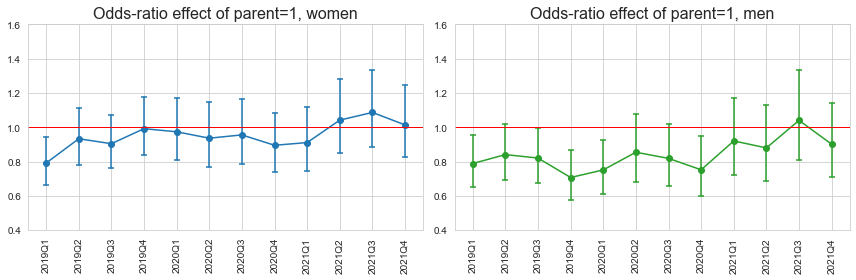

In [136]:
colors = sn.color_palette()
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Odds-ratio effect of parent=1, women",fontsize=16)
plt.plot(qs,coefs_t_f_par,marker='o')
plt.scatter(qs,bounds_t_f_par[:,0],marker='_',color=colors[0])
plt.scatter(qs,bounds_t_f_par[:,1],marker='_',color=colors[0])
for i in range(coefs_par.size):
    plt.plot((qs[i],qs[i]),(bounds_t_f_par[i,0],bounds_t_f_par[i,1]),c=colors[0])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.4,1.6)
 
plt.subplot(122)
plt.title("Odds-ratio effect of parent=1, men",fontsize=16)
plt.plot(qs,coefs_t_m_par,color=colors[2],marker='o')
plt.scatter(qs,bounds_t_m_par[:,0],marker='_',color=colors[2])
plt.scatter(qs,bounds_t_m_par[:,1],marker='_',color=colors[2])
for i in range(coefs_t_m_par.size):
    plt.plot((qs[i],qs[i]),(bounds_t_m_par[i,0],bounds_t_m_par[i,1]),c=colors[2])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.4,1.6)
plt.tight_layout()
plt.savefig('./plots_reg/prob_t_womenVmen_parent_time.pdf',format='pdf',bbox_inches='tight')
plt.show()

<a id='index'></a>


## Flows for mothers

Jump to
 - [flows' plots](#flows_plots)
 - [moving distributions](#mov_dist)
  - [moving distributions' plots](#mov_dist_plots)
  
 --------------

<a id='flows'></a>


### Flows

Import

In [106]:
path = './rawtabs_dem/'
states = ['P','T','U','I','A']

fl_mo = read_table(path+'flows2_mo.log',keyword='flow2',rescale=1,ncols=3)
fl_mo.rename(columns={'Percent':'Mothers'},inplace=True)
fl_nomo = read_table(path+'flows2_nomo.log',keyword='flow2',rescale=1,ncols=3)
fl_nomo.rename(columns={'Percent':'Not mothers'},inplace=True)

fl_all = pd.concat((fl_mo['Mothers'],fl_nomo['Not mothers']),axis=1)
fl_all = fl_all[np.logical_or(fl_all['Not mothers']>=1,fl_all['Mothers']>=1)]

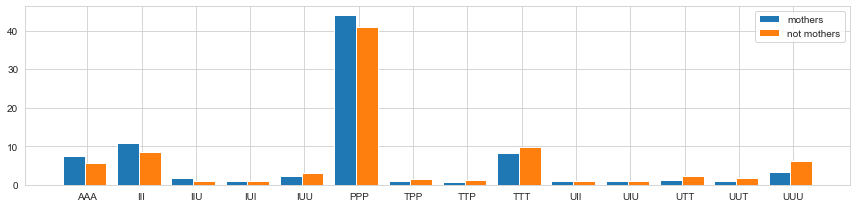

In [105]:
N = fl_all.index.size
plt.figure(figsize=(12,3))
plt.bar(np.arange(N),height=fl_all['Mothers'].values,width=0.4,label='mothers')
plt.bar(np.arange(N)+0.4,height=fl_all['Not mothers'].values,width=0.4,label='not mothers')
plt.xticks(np.arange(N)+0.25,fl_all.index)
plt.legend()
plt.tight_layout()
plt.show()

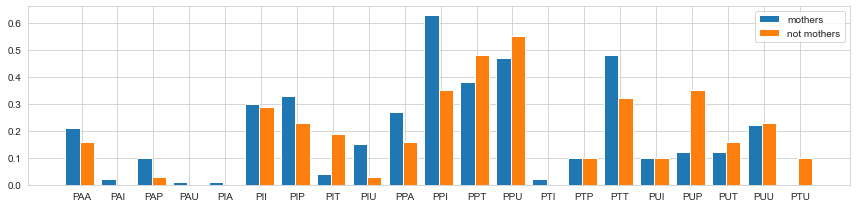

In [120]:
p_flows = []
for flow in fl_all.index:
    if flow[0]=="P" and flow!='PPP':
        p_flows.append(flow)

fl_p = fl_all.loc[p_flows]

N = fl_p.index.size
plt.figure(figsize=(12,3))
plt.bar(np.arange(N),height=fl_p['Mothers'].values,width=0.4,label='mothers')
plt.bar(np.arange(N)+0.4,height=fl_p['Not mothers'].values,width=0.4,label='not mothers')
plt.xticks(np.arange(N)+0.25,fl_p.index)
plt.legend()
plt.tight_layout()
plt.show()

In [121]:
path = './rawtabs_dem/'
states = ['P','T','U','I','A']

fl_mo = read_table(path+'flows3_mo.log',keyword='flow3',rescale=1,ncols=3)
fl_mo.rename(columns={'Percent':'Mothers'},inplace=True)
fl_nomo = read_table(path+'flows3_nomo.log',keyword='flow3',rescale=1,ncols=3)
fl_nomo.rename(columns={'Percent':'Not mothers'},inplace=True)

fl_all = pd.concat((fl_mo['Mothers'],fl_nomo['Not mothers']),axis=1)
fl_all = fl_all[np.logical_or(fl_all['Not mothers']>=1,fl_all['Mothers']>=1)]

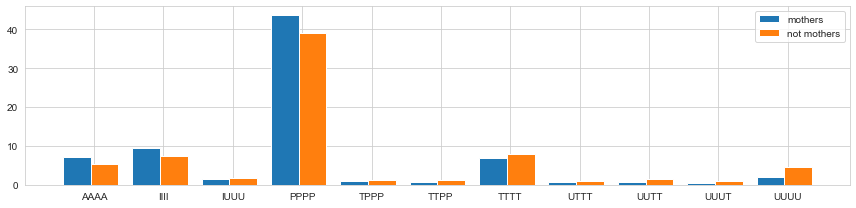

In [122]:
N = fl_all.index.size
plt.figure(figsize=(12,3))
plt.bar(np.arange(N),height=fl_all['Mothers'].values,width=0.4,label='mothers')
plt.bar(np.arange(N)+0.4,height=fl_all['Not mothers'].values,width=0.4,label='not mothers')
plt.xticks(np.arange(N)+0.25,fl_all.index)
plt.legend()
plt.tight_layout()
plt.show()

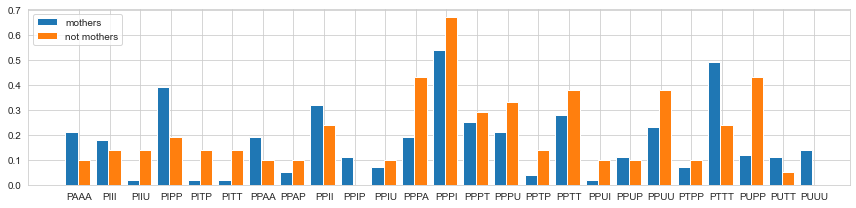

In [131]:
fl_all = pd.concat((fl_mo['Mothers'],fl_nomo['Not mothers']),axis=1)

p_flows = []
for flow in fl_all.index:
    if flow[0]=="P" and flow!='PPPP':
        p_flows.append(flow)

fl_p = fl_all.loc[p_flows]
fl_p = fl_p[np.logical_or(fl_p['Not mothers']>=.1,fl_p['Mothers']>=.1)]

N = fl_p.index.size
plt.figure(figsize=(12,3))
plt.bar(np.arange(N),height=fl_p['Mothers'].values,width=0.4,label='mothers')
plt.bar(np.arange(N)+0.4,height=fl_p['Not mothers'].values,width=0.4,label='not mothers')
plt.xticks(np.arange(N)+0.25,fl_p.index)
plt.legend()
plt.tight_layout()
plt.show()

## Moving distributions

In [76]:
# Expanded and modivfied version (first column now string)
def read_table_states(filename,keywords=['last_state','state','state1','state2','state3'],ncols=2,start=2):
    f = open(path+filename,'r')
    time_vars = keywords
    results_follow=0
    row_names = []
    dfs_t = {}
    t = 0

    t0 = start
    t1 = start+ncols
    table_raw = np.empty(t1-t0)
    for line in f:
        words = line.split()
        if len(words)>2 and words[2]=='close':
            break
        if len(words)>1 and words[0] == time_vars[t]:
            results_follow=1
            colnames = words[t0:t1]
        elif len(words)>1 and words[0] == "Total":
            results_follow=0
            table_raw = table_raw[1:,:]
            dfs_t[time_vars[t]] = pd.DataFrame(table_raw, columns=colnames,index=np.array(row_names))
            row_names = []
            table_raw = np.empty(t1-t0)
            t +=1
        elif len(words)>1 and results_follow==1:
            row_names.append(words[0])
            buff_v = []
            for w in words[t0:t1]: 
                w = w.replace(",","")
                buff_v.append(w)
            table_raw = np.vstack((table_raw,np.array(buff_v,dtype=float)))
    return dfs_t

In [78]:
dfs_t_moN_daE = read_table_states("stockdist_moN_daE.log")
dfs_t_moE_daE = read_table_states("stockdist_moE_daE.log")
dfs_t_moE_daN = read_table_states("stockdist_moE_daN.log")
dfs_t_moN_daN = read_table_states("stockdist_moN_daN.log")

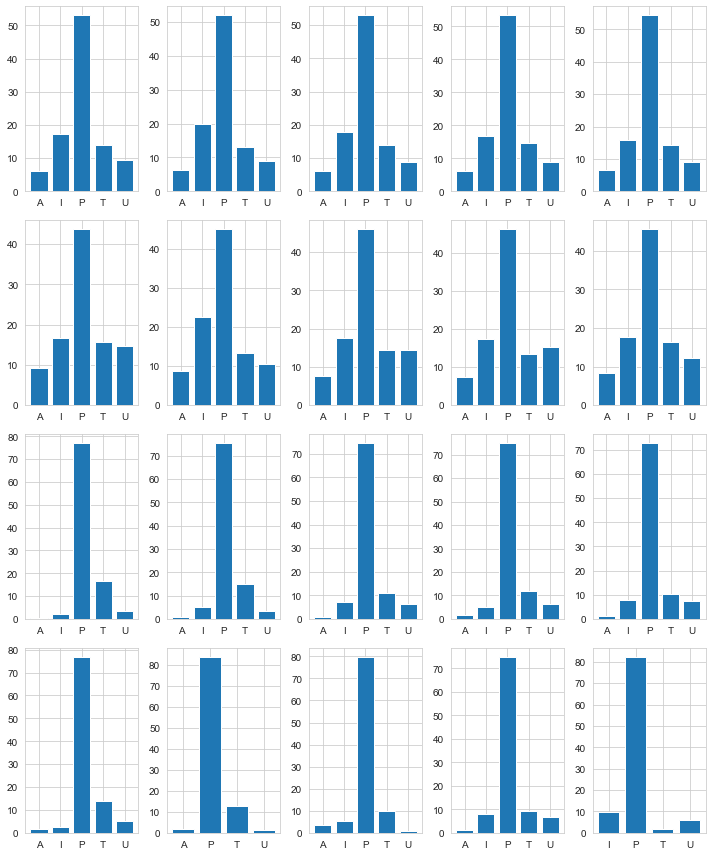

In [86]:
time_vars = ['last_state','state','state1','state2','state3']
h_types = ['Mother No, Father No','Mother No, Father STW','Mother STW, Father No','Mother STW, Father STW']
h_frames = [dfs_t_moN_daN,dfs_t_moN_daE,dfs_t_moE_daN,dfs_t_moE_daE]

plt.figure(figsize=(10,12))
for j, h_type in enumerate(h_types):
    for i,state_t in enumerate(time_vars):
        plt.subplot(4,5,(i+1)+j*5)
        plt.bar(h_frames[j][state_t].index,h_frames[j][state_t]['Percent'])
plt.tight_layout()
plt.show()

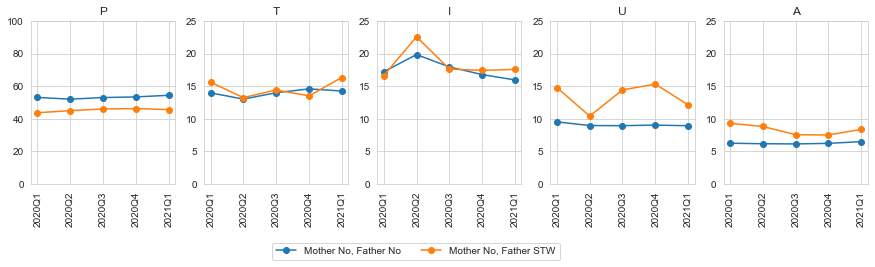

In [107]:
time_vars = ['last_state','state','state1','state2','state3']
states = ['P','T','I','U','A']
quarters = ['2020Q1','2020Q2','2020Q3','2020Q4','2021Q1']
h_types = ['Mother No, Father No','Mother No, Father STW']
h_frames = [dfs_t_moN_daN,dfs_t_moN_daE]

plt.figure(figsize=(15,3))
for i,st in enumerate(states):
    
    plt.subplot(151+i)
    plt.title(st)
    for j, h_type in enumerate(h_types):
        vals = []
        for state_t in (time_vars):
            if st in h_frames[j][state_t].index:
                vals.append(h_frames[j][state_t].loc[st,'Percent'])
            else:
                vals.append(np.nan)
        plt.plot(quarters,vals,marker="o",label=h_types[j])
    plt.xticks(rotation=90)
    if st=="P":
        plt.ylim(0,100)
    else:
        plt.ylim(0,25)
    if i==1:
        plt.legend(ncol=5,bbox_to_anchor=(2.5,-0.33))
# plt.tight_layout()
plt.show()